In [13]:
import pandas as pd
import urllib.request as url
import matplotlib.pyplot as plt
import numpy as np
import json
plt.style.use("ggplot")

In [2]:
res = url.urlopen('https://api.covid19india.org/states_daily.json')

In [3]:
data = json.load(res)

In [4]:
df = pd.DataFrame(data['states_daily'])

In [5]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Recovered,1,0,0,4,0,0,0,0


In [6]:
df['dateymd'][0]

'2020-03-14'

In [7]:
df['tt'][0]

'81'

In [8]:
df['dateymd'] = pd.to_datetime(df['dateymd'])

In [9]:
df['dateymd'][0]

Timestamp('2020-03-14 00:00:00')

In [10]:
df['dl'] = df['dl'].astype('int32')

In [12]:
df['tt'] = df['tt'].astype('int32')
df['mh'] = df['mh'].astype('int32')
df['rj'] = df['rj'].astype('int32')

In [20]:
confirmed_df = df[df['status'] == 'Confirmed']
recovered_df = df[df['status'] == 'Recovered']
deceased_df = df[df['status'] == 'Deceased']

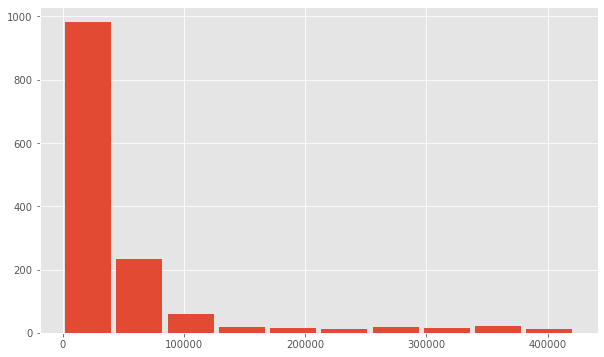

In [15]:
plt.figure(figsize=(10,6))
plt.hist(df['tt'],rwidth=0.9)
plt.show()

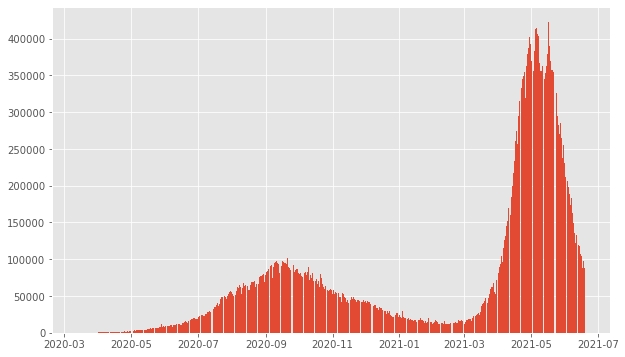

In [17]:
plt.figure(figsize=(10,6))
plt.bar(df['dateymd'], df['tt'],width=0.9)
plt.show()

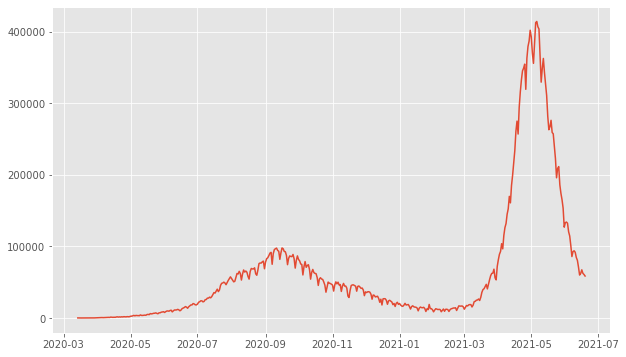

In [21]:
plt.figure(figsize=(10,6))
plt.plot(confirmed_df['dateymd'], confirmed_df['tt'])
plt.show()

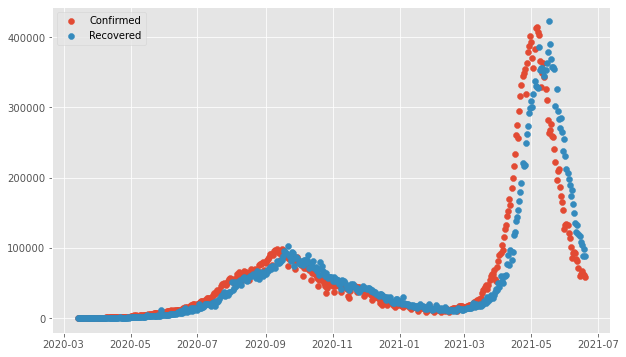

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(confirmed_df['dateymd'], confirmed_df['tt'], label='Confirmed')
plt.scatter(recovered_df['dateymd'], recovered_df['tt'], label='Recovered')
plt.legend()
plt.show()

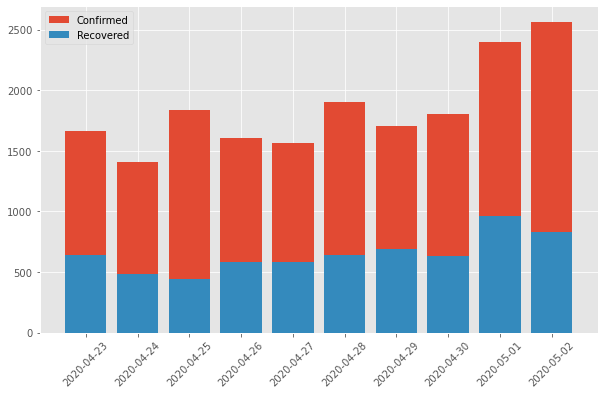

In [30]:
plt.figure(figsize=(10,6))
plt.bar(confirmed_df['dateymd'][40:50], confirmed_df['tt'][40:50], label='Confirmed')
plt.bar(recovered_df['dateymd'][40:50], recovered_df['tt'][40:50], label='Recovered')
plt.legend()
# plt.xticks(rotation='vertical')
plt.xticks(rotation=45)
plt.show()

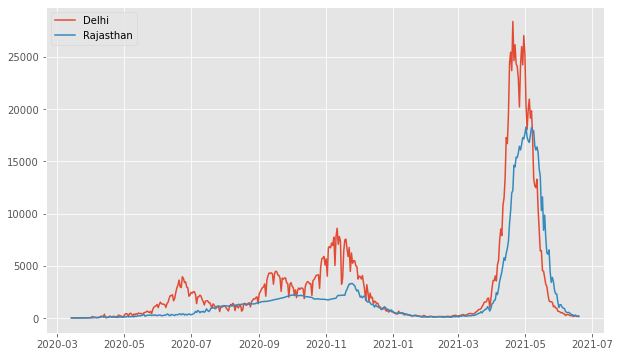

In [32]:
plt.figure(figsize=(10,6))
plt.plot(confirmed_df['dateymd'], confirmed_df['dl'],label='Delhi')
# plt.plot(confirmed_df['dateymd'], confirmed_df['mh'],label='Maharashtra')
plt.plot(confirmed_df['dateymd'], confirmed_df['rj'],label='Rajasthan')
plt.legend()
plt.show()

In [53]:
confirmed_df.shape

(463, 42)

In [65]:
confirmed_df.index = confirmed_df['date']

In [77]:
# plt.figure(figsize=(10,6))
# axes = confirmed_df['dl'][100:110].plot.bar(width=0.9)

# for ax in axes.patches:
#     print(ax)

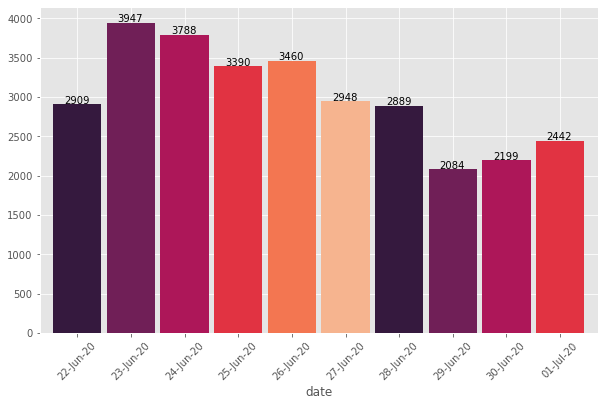

In [78]:
import seaborn as sns

plt.figure(figsize=(10,6))
axes = confirmed_df['dl'][100:110].plot.bar(width=0.9, color=sns.color_palette('rocket'))

for ax in axes.patches:
    axes.annotate(format(ax.get_height()), (ax.get_x() + 0.2, ax.get_height() + 10))

plt.xticks(rotation=45)
plt.show()